# 02-02: Analisi dataset Gallstone

**2. Il dataset qui a fianco proviene dall'UCI ML laboratory https://archive.ics.uci.edu/dataset/1150/gallstone-1**

Il dataset clinico è stato raccolto presso l'Ambulatorio di Medicina Interna dell'Ospedale Ankara VM Medical Park e include dati di 319 individui (giugno 2022 – giugno 2023), di cui 161 con diagnosi di calcolosi biliare. Esso contiene 38 variabili, tra cui dati demografici, di bioimpedenza e di laboratorio, ed è stato approvato eticamente dal Comitato Etico dell'Ospedale della Città di Ankara (E2-23-4632). Le variabili demografiche comprendono età, sesso, altezza, peso e BMI. I dati di bioimpedenza includono acqua totale, extracellulare e intracellulare, massa muscolare e grassa, proteine, area del grasso viscerale e grasso epatico. Le variabili di laboratorio comprendono glucosio, colesterolo totale, HDL, LDL, trigliceridi, AST, ALT, ALP, creatinina, GFR, PCR, emoglobina e vitamina D. Il dataset è completo, senza valori mancanti, ed è bilanciato rispetto alla presenza della malattia, eliminando la necessità di ulteriori fasi di pre-processing. Fornisce una solida base per la previsione della calcolosi biliare tramite modelli di machine learning basati su caratteristiche non derivanti da imaging.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
base = pd.read_excel("inml25tst02.xlsx", sheet_name="Es 2")
df = base.drop(columns=base.columns[:9]).set_index("id").sort_index()

In [16]:
df.head(1)

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
id,,,,,,,,,,,,,,,,,,,,,
1,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0


In [17]:
X = df.drop(columns=["Gallstone Status"])
y = df["Gallstone Status"]

## Correlazione tra input e output

**2.1 Siccome le variabili sono tante, vorremmo concentrarci su quelle che sono più correlate a quella di output, Gallstone Status. Calcolare la correlazione di ciascuna variabile con quella di output, ed elencare le 15 variabili più correlate.**

*Siccome non abbiamo ancora verificato la distribuzione delle variabili, è meglio usare la correlazione di Spearman, invece della solita correlazione lineare (di Pearson). Questa si ottiene calcolando la correlazione di lineare dopo aver sostituito i valori della variabile con i ranghi associati a quei valori, quindi 1 al posto del valore più piccolo, 2 al posto del secondo più piccolo, e così via.*

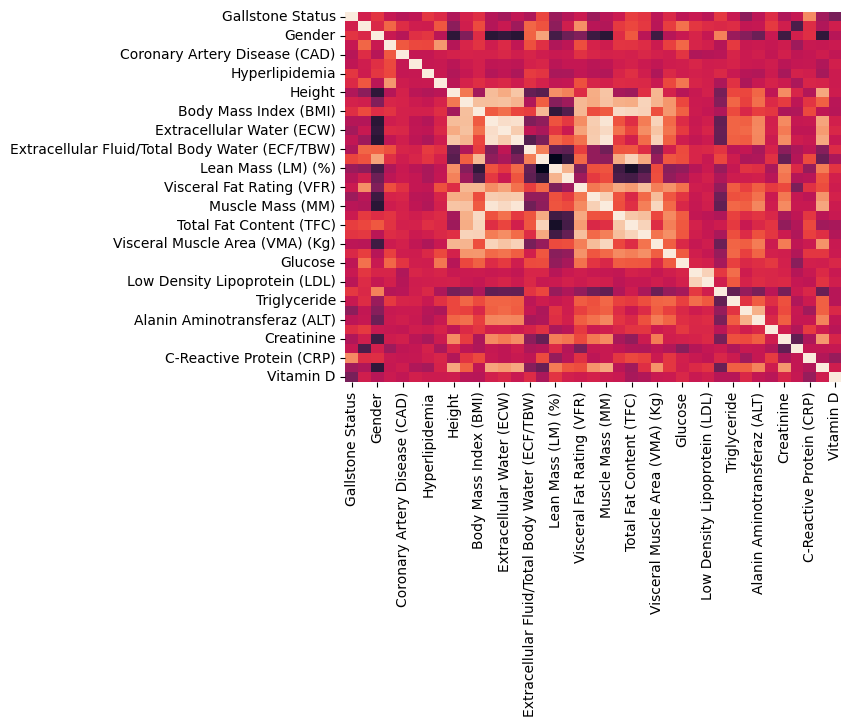

In [21]:
spearman_corr = df.corr(method="spearman")
sns.heatmap(spearman_corr, cbar=False)
plt.show()

In [25]:
k = 15
spearman_corr["Gallstone Status"].sort_values()[:k]

Vitamin D                                        -0.379213
Aspartat Aminotransferaz (AST)                   -0.289784
Lean Mass (LM) (%)                               -0.227886
Bone Mass (BM)                                   -0.219057
Hemoglobin (HGB)                                 -0.191811
Extracellular Water (ECW)                        -0.180222
Creatinine                                       -0.134031
Extracellular Fluid/Total Body Water (ECF/TBW)   -0.132715
Height                                           -0.121004
Total Body Water (TBW)                           -0.105059
Body Protein Content (Protein) (%)               -0.104445
Coronary Artery Disease (CAD)                    -0.096998
Muscle Mass (MM)                                 -0.086199
Low Density Lipoprotein (LDL)                    -0.080484
Alanin Aminotransferaz (ALT)                     -0.071140
Name: Gallstone Status, dtype: float64

**2.2 Studiare la distribuzione delle 15 variabili trovate sopra, sia univariata, sia bivariata, alla ricerca di outliers e altri difetti. Si scelgano opportune trasformazioni per facilitare questo compito e per ottenere migliori risultati negli esercizi seguenti.**

**2.3 Eseguire una PCA delle variabili da L in poi, usando le versioni trasformate più regolari per quelle che si sono modificate al punto precedente. Quante componenti conviene tenere?**

**2.4 Si usino le componenti ridotte, ottenute con la PCA, per prevedere la variabile di output, Gallstone Status. È richiesto di usare qualche tecnica di validazione per stimare l'accuratezza del metodo.**